In [1]:
import pandas as pd

In [2]:
from mlproject.features.basic_features import (
    convert_datetime,
    add_distance_km,
    add_pickup_month,
    add_pickup_hour,
    add_pickup_weekday,
)

In [3]:
train = pd.read_csv("../src/mlproject/data/train_clean.csv")

In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train = convert_datetime(train, ["pickup_datetime"])  # don't touch dropoff_datetime
train = add_distance_km(train)
train = add_pickup_month(train)
train = add_pickup_hour(train)
train = add_pickup_weekday(train)

In [6]:
display(train[["pickup_datetime", "distance_km", "pickup_month", "pickup_hour", "pickup_weekday"]].head())
print("NaT pickup_datetime:", train["pickup_datetime"].isna().sum())
print("Missing distance_km:", train["distance_km"].isna().sum())
print("distance_km min/max:", train["distance_km"].min(), train["distance_km"].max())

,pickup_datetime,distance_km,pickup_month,pickup_hour,pickup_weekday
0,2016-03-14 17:24:55,1.498521,3,17,0
1,2016-06-12 00:43:35,1.805507,6,0,6
2,2016-01-19 11:35:24,6.385098,1,11,1
3,2016-04-06 19:32:31,1.485498,4,19,2
4,2016-03-26 13:30:55,1.188588,3,13,5


NaT pickup_datetime: 0
Missing distance_km: 0
distance_km min/max: 0.00042417498075120186 1240.9086766508526


In [7]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x186087f88d0>,
 'caps': [<matplotlib.lines.Line2D at 0x186087f9bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x186087dfb50>],
 'medians': [<matplotlib.lines.Line2D at 0x186087fb490>],
 'fliers': [<matplotlib.lines.Line2D at 0x186087fbfd0>],
 'means': []}

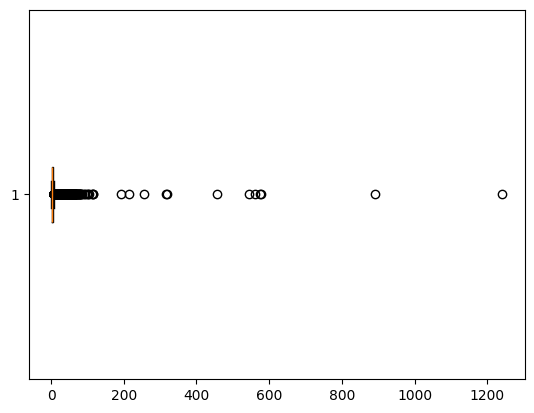

In [8]:
plt.boxplot(train.distance_km,vert=False)

In [9]:
from mlproject.features.basic_features import drop_large_distance

before = len(train)
train = drop_large_distance(train, max_km=200)
after = len(train)

print("Rows before:", before)
print("Rows after :", after)
print("Dropped    :", before - after)
print("Max distance after filter:", train["distance_km"].max())


Rows before: 1443718
Rows after : 1443707
Dropped    : 11
Max distance after filter: 191.4027922230802


{'whiskers': [<matplotlib.lines.Line2D at 0x18608892010>,
 'caps': [<matplotlib.lines.Line2D at 0x18608893950>,
 'boxes': [<matplotlib.lines.Line2D at 0x186088914d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1860881e390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1860889d190>],
 'means': []}

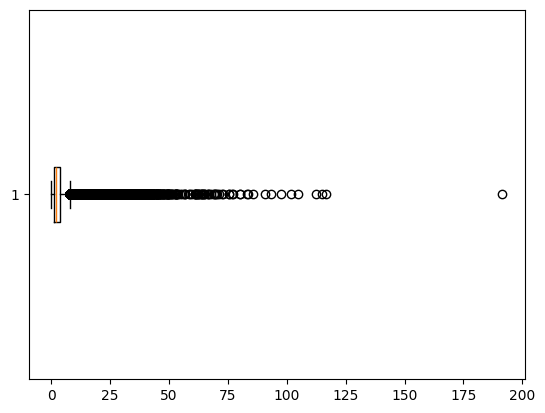

In [10]:
plt.boxplot(train.distance_km,vert=False)